In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid19data = pd.read_csv("train.csv")

#WHS stands for World Health System
WHS = pd.read_csv("2.12_Health_systems.csv")

In [3]:
print(covid19data.Country_Region.unique())

print(covid19data[covid19data.Country_Region == "China"])

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark'
 'Diamond Princess' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Holy See' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Kenya' 'Korea, Sout

In [4]:
data = covid19data.query("Date>'2020-01-22'and Date<='2020-03-27'")
target_value = covid19data.query("Date >= '2020-03-28'")


timestamps = []
countries = []
provinces = []
confirmed_cases = []
fatalities = []

vector_df = pd.DataFrame(columns=["Country_Region", "Province_State", "Confirmed_Cases_X", "Fatalities_X"])

for country in data.Country_Region.unique():
    for province in data.query(f'Country_Region=="{country}"').Province_State.unique():
        countries.append(country)
        provinces.append(province)
        if str(province) == "nan":
            temp_df = data.query(f'Country_Region=="{country}"')
        else:
            temp_df = data.query(f'Country_Region=="{country}" and Province_State =="{province}"')
        confirmed_cases.append([float(x) for x in temp_df["ConfirmedCases"]])
        fatalities.append([float(x) for x in temp_df["Fatalities"]])
        
        
vector_df.Country_Region = countries
vector_df.Province_State = provinces
vector_df.Confirmed_Cases_X = confirmed_cases 
vector_df.Fatalities_X = fatalities; vector_df.head(5)

print(len(confirmed_cases))
print(target_value)

294
          Id                Province_State          Country_Region  \
66        67                           NaN             Afghanistan   
133      167                           NaN                 Albania   
200      267                           NaN                 Algeria   
267      367                           NaN                 Andorra   
334      467                           NaN                  Angola   
401      567                           NaN     Antigua and Barbuda   
468      667                           NaN               Argentina   
535      767                           NaN                 Armenia   
602      867  Australian Capital Territory               Australia   
669      967               New South Wales               Australia   
736     1067            Northern Territory               Australia   
803     1167                    Queensland               Australia   
870     1267               South Australia               Australia   
937     1367    

In [5]:
df = vector_df.merge(WHS, on=['Country_Region', 'Province_State'], how = "left") ; df.head(5)
df[['Health_exp_pct_GDP_2016',
       'Health_exp_public_pct_2016', 'Health_exp_out_of_pocket_pct_2016',
       'Health_exp_per_capita_USD_2016', 'per_capita_exp_PPP_2016',
       'External_health_exp_pct_2016', 'Physicians_per_1000_2009-18',
       'Nurse_midwife_per_1000_2009-18',
       'Specialist_surgical_per_100000_2008-18',
       'Completeness_of_birth_reg_2009-18',
       'Completeness_of_death_reg_2008-16']] = df[['Health_exp_pct_GDP_2016',
       'Health_exp_public_pct_2016', 'Health_exp_out_of_pocket_pct_2016',
       'Health_exp_per_capita_USD_2016', 'per_capita_exp_PPP_2016',
       'External_health_exp_pct_2016', 'Physicians_per_1000_2009-18',
       'Nurse_midwife_per_1000_2009-18',
       'Specialist_surgical_per_100000_2008-18',
       'Completeness_of_birth_reg_2009-18',
       'Completeness_of_death_reg_2008-16']].fillna(0, axis=1)

df.head(5)

,Country_Region,Province_State,Confirmed_Cases_X,Fatalities_X,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_100000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,0.0
1,Albania,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,0.0
3,Andorra,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Andorra,10.4,49.1,41.7,3834.7,4978.7,0.0,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,0.0,25.0,0.0


In [6]:
print(f'Data set contains info of:\t{len(df["Country_Region"].unique())} countries')

Data set contains info of:	173 countries


ValueError: cannot convert float NaN to integer

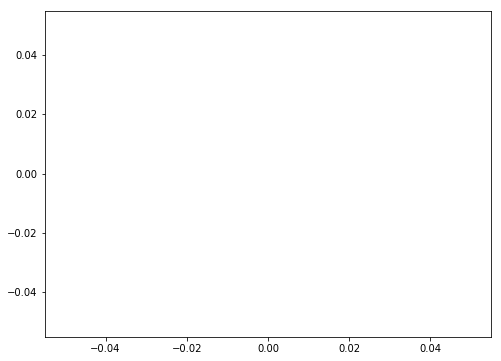

In [7]:
plt.figure(figsize=[8,6])
sns.distplot(WHS["Health_exp_pct_GDP_2016"])

In [ ]:
print(df[df["Country_Region"] =="US"].Province_State)
print(df[df["Country_Region"] =="Italy"].Confirmed_Cases_X)


In [ ]:
print(df[(df.Country_Region == "China") & (df.Province_State == "Hubei")].Confirmed_Cases_X)

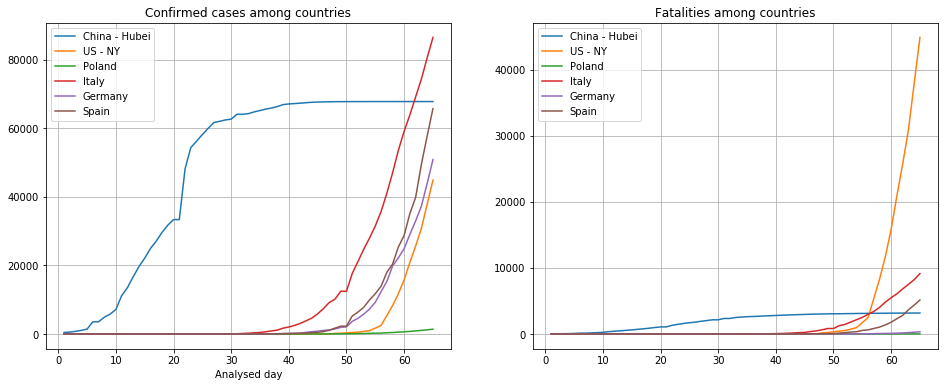

In [8]:
f, ax = plt.subplots(1, 2, figsize=[16, 6])
number_of_days = 66
countries_to_plot = ["Poland", "Italy", "Germany", "Spain"]

ax[0].plot(range(1, number_of_days), df[(df.Country_Region == "China") & (df.Province_State == "Hubei")].Confirmed_Cases_X.values[0], label = "China - Hubei")
ax[0].plot(range(1, number_of_days), df[(df.Country_Region == "US") & (df.Province_State == "New York")].Confirmed_Cases_X.values[0], label = "US - NY")
for country in countries_to_plot:
     ax[0].plot(range(1, number_of_days), df[df["Country_Region"] == country]["Confirmed_Cases_X"].values[0], label = country)
ax[0].set_title("Confirmed cases among countries")
ax[0].set_xlabel("Analysed day")
ax[0].legend()
ax[0].grid()

ax[1].plot(range(1, number_of_days), df[(df.Country_Region == "China") & (df.Province_State == "Hubei")].Fatalities_X.values[0], label = "China - Hubei")
ax[1].plot(range(1, number_of_days), df[(df.Country_Region == "US") & (df.Province_State == "New York")].Confirmed_Cases_X.values[0], label = "US - NY")
for country in countries_to_plot:
     ax[1].plot(range(1, number_of_days), df[df["Country_Region"] == country].Fatalities_X.values[0], label = country)
ax[1].set_title("Fatalities among countries")
ax[0].set_xlabel("Analysed day")
ax[1].legend()
ax[1].grid()

In [9]:
df = df.merge(target_value, on = ["Country_Region", "Province_State"]); df.head(5)
df["CF_Vector"] = [np.asarray([trends["Confirmed_Cases_X"],trends["Fatalities_X"]]) for idx,trends in df.iterrows()]
# target_value = pd.DataFrame(target_value)
# target_value.reset_index()
print(df["CF_Vector"][0])

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
    1.   1.   1.   4.   4.   5.   7.   7.   7.  11.  16.  21.  22.  22.
   22.  24.  24.  40.  40.  74.  84.  94. 110.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   1.   1.   1.   2.   4.   4.]]


In [10]:
print(df["CF_Vector"]); df["CF_Vector"].shape

0      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
2      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
5      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
6      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
7      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
8      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
9      [[0.0, 0.0, 0.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0,...
10     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
11     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 2.0,...
12     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
13     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
14     [[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0,...
15     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
16     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
17     [[0.0, 0.0, 0.0, 0.0, 0.

(295,)

In [11]:
df["CF_Vector"] = np.transpose(df["CF_Vector"]); print(df["CF_Vector"][0]); df["CF_Vector"].shape

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
    1.   1.   1.   4.   4.   5.   7.   7.   7.  11.  16.  21.  22.  22.
   22.  24.  24.  40.  40.  74.  84.  94. 110.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   1.   1.   1.   2.   4.   4.]]


(295,)

In [12]:
print(df["CF_Vector"][0][0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   4.   4.   5.   7.   7.   7.  11.  16.  21.  22.  22.
  22.  24.  24.  40.  40.  74.  84.  94. 110.]


In [13]:
print(df["CF_Vector"][0]); df["CF_Vector"].shape

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
    1.   1.   1.   4.   4.   5.   7.   7.   7.  11.  16.  21.  22.  22.
   22.  24.  24.  40.  40.  74.  84.  94. 110.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   1.   1.   1.   2.   4.   4.]]


(295,)

In [14]:
df.head(5)

,Country_Region,Province_State,Confirmed_Cases_X,Fatalities_X,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,...,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_100000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,Id,Date,ConfirmedCases,Fatalities,CF_Vector
0,Afghanistan,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Afghanistan,10.2,5.1,77.4,57.2,162.8,...,0.3,0.3,0.0,42.3,0.0,67,2020-03-28,110.0,4.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,Albania,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Albania,6.7,41.4,58.0,271.5,759.7,...,1.2,3.6,11.6,98.4,53.0,167,2020-03-28,197.0,10.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,Algeria,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Algeria,6.6,67.7,30.9,260.4,998.2,...,1.8,2.2,12.1,100.0,0.0,267,2020-03-28,454.0,29.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,Andorra,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Andorra,10.4,49.1,41.7,3834.7,4978.7,...,3.3,4.0,83.1,100.0,80.0,367,2020-03-28,308.0,3.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,Angola,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Angola,2.9,44.1,35.2,95.2,185.8,...,0.2,1.3,0.0,25.0,0.0,467,2020-03-28,5.0,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [15]:
print(set(df.Country_Region.unique()) ^ set(target_value.Country_Region.unique()))
print(set(df.Province_State.unique()) ^ set(target_value.Province_State.unique()))

set()
set()


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, Dropout, LSTM, Concatenate, LeakyReLU, Flatten
from keras.activations import relu
from keras.losses import mean_squared_error, hinge, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split


In [17]:
X_features = df.drop(columns=["Country_Region","Confirmed_Cases_X", "Fatalities_X", "Province_State", "World_Bank_Name", "Id", "Date", "ConfirmedCases", "Fatalities", "CF_Vector"], axis=1)
X_vector = np.asarray(df["CF_Vector"])
y_cases = df[["ConfirmedCases"]]
y_fatalities = df[["Fatalities"]]

In [18]:
print(X_vector[0])

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
    1.   1.   1.   4.   4.   5.   7.   7.   7.  11.  16.  21.  22.  22.
   22.  24.  24.  40.  40.  74.  84.  94. 110.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   1.   1.   1.   2.   4.   4.]]


In [65]:
X_vector_t = X_vector.reshape(295,1,1)

In [46]:
print(X_vector_t)

[[[array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   4.,   4.,   5.,   7.,   7.,   7.,  11.,  16.,  21.,  22.,
         22.,  22.,  24.,  24.,  40.,  40.,  74.,  84.,  94., 110.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.,   1.,   2.,   4.,   4.]])]
  [array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

In [47]:
print(X_features.shape)
X_features.head(5)

(295, 11)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [48]:
scaler = MinMaxScaler()
X_features = scaler.fit_transform(X_features)
print(X_features.shape)
print(X_features)

(295, 11)
[[0.83606557 0.053125   0.96029777 ... 0.         0.423      0.        ]
 [0.54918033 0.43125    0.71960298 ... 0.0593047  0.984      0.53      ]
 [0.54098361 0.70520833 0.38337469 ... 0.06186094 1.         0.        ]
 ...
 [0.46721311 0.49375    0.55334988 ... 0.         0.96       0.        ]
 [0.36885246 0.39895833 0.15012407 ... 0.00766871 0.113      0.        ]
 [0.7704918  0.484375   0.2630273  ... 0.00817996 0.38       0.        ]]


In [49]:
#X_features = X_features.reshape(1, 295, 11)
print(X_features.shape)
print(X_features)

(295, 11)
[[0.83606557 0.053125   0.96029777 ... 0.         0.423      0.        ]
 [0.54918033 0.43125    0.71960298 ... 0.0593047  0.984      0.53      ]
 [0.54098361 0.70520833 0.38337469 ... 0.06186094 1.         0.        ]
 ...
 [0.46721311 0.49375    0.55334988 ... 0.         0.96       0.        ]
 [0.36885246 0.39895833 0.15012407 ... 0.00766871 0.113      0.        ]
 [0.7704918  0.484375   0.2630273  ... 0.00817996 0.38       0.        ]]


In [50]:
print(X_vector.shape)
X_vector

(295,)


array([array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   4.,   4.,   5.,   7.,   7.,   7.,  11.,  16.,  21.,  22.,
         22.,  22.,  24.,  24.,  40.,  40.,  74.,  84.,  94., 110.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.,   1.,   2.,   4.,   4.]]),
       array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 

In [51]:
X_vector = np.asarray(X_vector).reshape(1, 295, 1)

In [52]:
print(X_vector)

[[[array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   4.,   4.,   5.,   7.,   7.,   7.,  11.,  16.,  21.,  22.,
         22.,  22.,  24.,  24.,  40.,  40.,  74.,  84.,  94., 110.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.,   1.,   2.,   4.,   4.]])]
  [array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

In [53]:
y_cases.head(5)

,ConfirmedCases
0,110.0
1,197.0
2,454.0
3,308.0
4,5.0


In [54]:
y_fatalities.head(5)

,Fatalities
0,4.0
1,10.0
2,29.0
3,3.0
4,0.0


In [66]:
LSTM_1_input_layer = Input(shape=(295, 1)) ##(2,1)
LSTM_1 = LSTM(64, return_sequences=True, recurrent_dropout=0.2)(LSTM_1_input_layer)


Dense_input_layer = Input(shape=(11,)) ## (11,)
Dense_2 = Dense(16)(Dense_input_layer)
Dense_dropout = Dropout(0.2)(Dense_2)



#cases output branch
rnn_c = LSTM(32)(LSTM_1)
merge_c = Concatenate(axis=-1)([rnn_c, Dense_dropout])
dense_c = Dense(128)(merge_c)
dropout_c = Dropout(0.3)(dense_c)
cases = Dense(1, activation=LeakyReLU(alpha=0.1),name="cases")(dropout_c)



#fatality output branch
rnn_f = LSTM(32)(LSTM_1)
merge_f = Concatenate(axis=-1)([rnn_f, Dense_dropout])
dense_f = Dense(128)(merge_f)
dropout_f = Dropout(0.3)(dense_f)
fatalities = Dense(1, activation=LeakyReLU(alpha=0.1), name="fatalities")(dropout_f)


model = Model([LSTM_1_input_layer, Dense_input_layer], [cases,fatalities])

model.summary()

model.compile(loss=mean_absolute_percentage_error, optimizer='adam')



Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           (None, 295, 1)       0                                            
__________________________________________________________________________________________________
input_24 (InputLayer)           (None, 11)           0                                            
__________________________________________________________________________________________________
lstm_32 (LSTM)                  (None, 295, 64)      16896       input_23[0][0]                   
__________________________________________________________________________________________________
dense_29 (Dense)                (None, 16)           192         input_24[0][0]                   
___________________________________________________________________________________________

C:\Users\sedzielskim\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
C:\Users\sedzielskim\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [67]:
history = model.fit([X_vector_t, X_features], [y_cases, y_fatalities], epochs=50, batch_size=32)

ValueError: Error when checking input: expected input_23 to have shape (295, 1) but got array with shape (1, 1)

In [ ]:
prediction, y_test

In [ ]:
grid_params = {'loss': ['mean_square_error', 'mean_absolute_percentage_error']}

model = KerasRegressor(build_fn=build_model, verbose=0)

grid = GridSearchCV(estimator=model, param_grid=grid_params, verbose=1, n_jobs=1)

grid_result = grid.fit(X_train, y_train, epochs=100, batch_size=6)
